In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle
import sys
current_dir = %pwd

# Sarsa using RAM features

In [4]:
log_dir = current_dir + '/../logs/logs_ram_base'
ram_log_dir = log_dir + '/sarsa_RAM'
numtrials = 5 # Trials, epochs, what have you
numep = 3000

In [5]:
# Have a look at the data if you want
with open(ram_log_dir + '/SARSA_RAM_1.log') as f:
    log = pickle.load(f)

In [40]:
# store data in a 2d array
steps = np.zeros((numep,numtrials))
rewards = np.zeros((numep,numtrials))

for t in range(1,numtrials+1):
    with open(ram_log_dir + '/SARSA_RAM_{}.log'.format(t), 'rb') as f:
        log = pickle.load(f)
        actualLength = len(log['steps'])
        steps[:,t-1] = np.array(log['steps'])
        rewards[:,t-1] = np.array(log['reward'])

Calculate basic statistics of number of steps over different trials

In [2]:
from scipy import stats
mean_steps = np.mean(steps,axis=1) #average steps
err = stats.sem(steps,axis=1) #standard error of mean
print "An average of %s steps" % str(np.mean(mean_steps))

#statistics for first 500 episodes
mean_500 = np.mean(steps[:500:],axis=1)
err_500 = stats.sem(steps[:500:],axis=1) #standard error of mean 

NameError: name 'np' is not defined

Plot learning curves with 95% confidence (t_dist standard error Note: this assumes normal distribution of means, probably not true here)

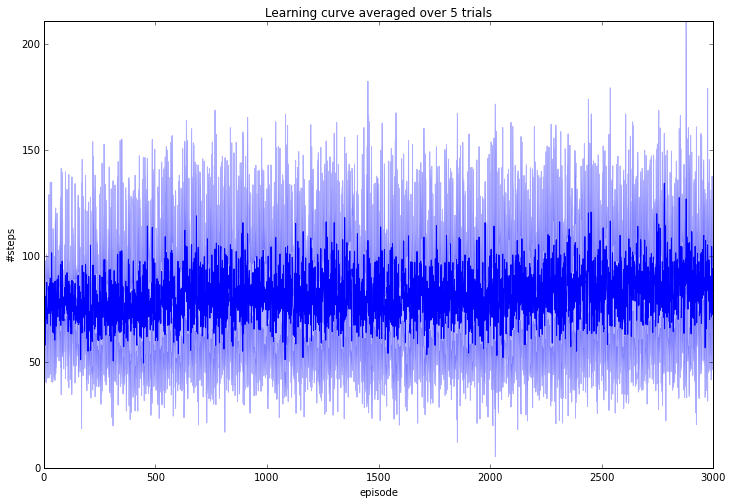

In [11]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., numtrials-1)

color='blue'
plt.plot(mean_steps)
plt.fill_between(np.arange(numep),(mean_steps-t*err),(mean_steps+t*err),alpha=0.3,color=color)

plt.xlabel('episode')
plt.ylabel('#steps')
plt.ylim((0,np.max(mean_steps+t*err)))
plt.title('Learning curve averaged over {} trials'.format(numtrials))

We can smooth the curves by taking a running average or applying a filter

In [12]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

#standard running average
def running_average(x,window,axis=0):
    return filters.convolve1d(x,np.ones(window),axis)

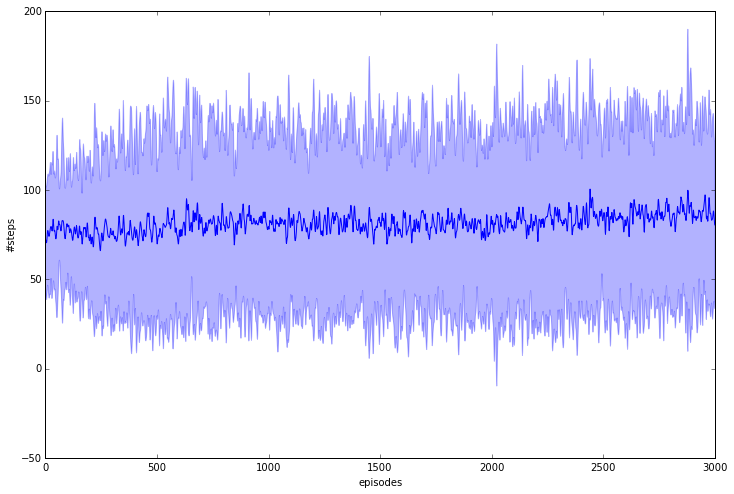

In [51]:
mean_sm = smoothing(mean_steps, 100, 0)
err_sm = smoothing(err, 100, 0)

plt.figure(figsize=(12,8))
plt.plot(mean_sm)
plt.fill_between(np.arange(numep),(mean_sm-t*err_sm),(mean_sm+t*err_sm),alpha=0.3,color=color)

plt.ylabel('#steps')
plt.xlabel('episodes')


## Reward analysis

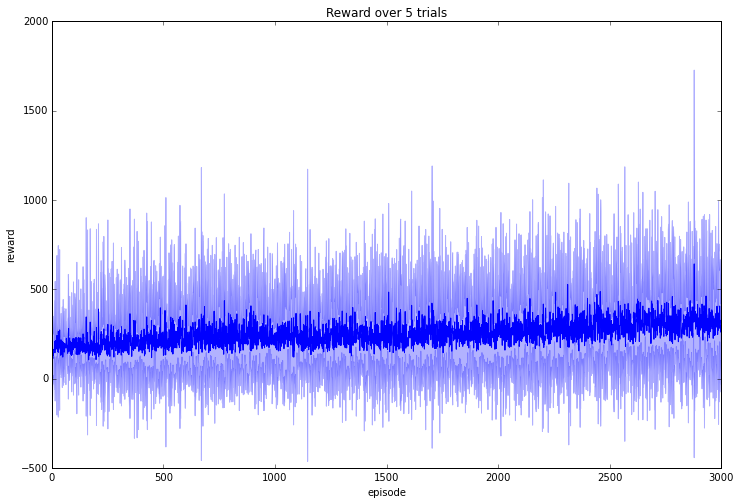

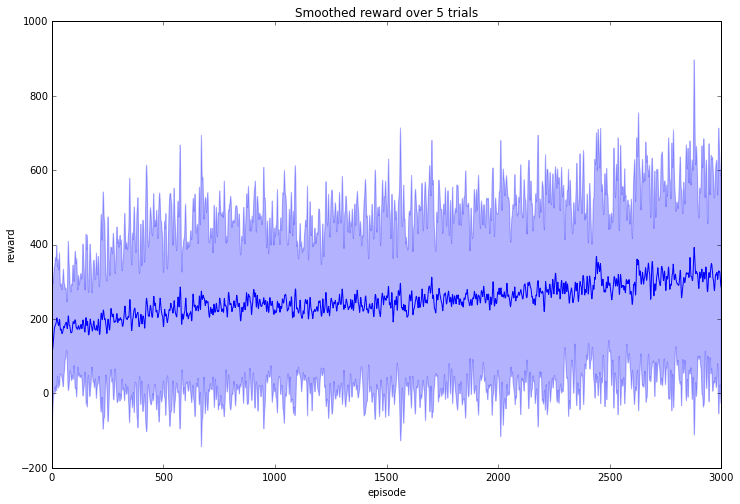

In [60]:
mean_rew = np.mean(rewards,axis=1) #average reward
err_rew = stats.sem(rewards,axis=1) #standard error of mean

mean_rew_sm = smoothing(mean_rew, 100, 0)
err_rew_sm = smoothing(err_rew, 100, 0)

plt.figure(figsize=(12,8))

plt.plot(mean_rew)
plt.fill_between(np.arange(numep),(mean_rew-t*err_rew),(mean_rew+t*err_rew),alpha=0.3,color='blue')

plt.ylabel('reward')
plt.xlabel('episode')
plt.title('Reward over {} trials'.format(numtrials))

plt.figure(figsize=(12,8))

plt.plot(mean_rew_sm)
plt.fill_between(np.arange(numep),(mean_rew_sm-t*err_rew_sm),(mean_rew_sm+t*err_rew_sm),alpha=0.3,color='blue')

plt.ylabel('reward')
plt.xlabel('episode')
plt.title('Smoothed reward over {} trials'.format(numtrials))